In [2]:
!pip install numpy==1.23.5




Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy==1.23.5 from https://files.pythonhosted.org/packages/19/0d/b8c34e4baf258d77a8592bdce45183e9a12874c167f5966c7dd467b74ea9/numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB 991.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/14.6 MB 2.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/14.6 MB 6.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.7/14.6 MB 14.1 MB/s eta 0:00:01
   -------- ------------------------------- 3.3/14.6 MB 13.9 MB/s eta 0:00:01
   ---------- ----------------------------- 3.9/14.6 MB 13.8 MB/s eta 0:00:01
   ----------- ---------------------------- 4.1/14.6 MB 13.8 MB/s eta 0:00:01
   ----------- ---------------------------- 4.1/14.6 MB 13.8 MB/s eta 0:00:01
   ----------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\praks\\AppData\\Roaming\\Python\\Python311\\site-packages\\~~mpy.libs\\libscipy_openblas64_-fb1711452d4d8cee9f276fd1449ee5c7.dll'
Check the permissions.



In [18]:
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy as tf_loss
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [19]:
IMAGE_SIZE = [224, 224]

In [20]:
train_directory = r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\Birds dataset\train'
test_directory = r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\Birds dataset\test'
val_directory = r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\Birds dataset\valid'



In [21]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [22]:
  # useful for getting number of classes
folders = glob(r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\Birds dataset\train\*')
len(folders)

525

In [23]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [27]:
print(len(training_set))
print(len(test_set))

2645
83


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')

In [28]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model(r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\BC.h5', compile=False)


In [29]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
lab

{0: 'ABBOTTS BABBLER',
 1: 'ABBOTTS BOOBY',
 2: 'ABYSSINIAN GROUND HORNBILL',
 3: 'AFRICAN CROWNED CRANE',
 4: 'AFRICAN EMERALD CUCKOO',
 5: 'AFRICAN FIREFINCH',
 6: 'AFRICAN OYSTER CATCHER',
 7: 'AFRICAN PIED HORNBILL',
 8: 'AFRICAN PYGMY GOOSE',
 9: 'ALBATROSS',
 10: 'ALBERTS TOWHEE',
 11: 'ALEXANDRINE PARAKEET',
 12: 'ALPINE CHOUGH',
 13: 'ALTAMIRA YELLOWTHROAT',
 14: 'AMERICAN AVOCET',
 15: 'AMERICAN BITTERN',
 16: 'AMERICAN COOT',
 17: 'AMERICAN DIPPER',
 18: 'AMERICAN FLAMINGO',
 19: 'AMERICAN GOLDFINCH',
 20: 'AMERICAN KESTREL',
 21: 'AMERICAN PIPIT',
 22: 'AMERICAN REDSTART',
 23: 'AMERICAN ROBIN',
 24: 'AMERICAN WIGEON',
 25: 'AMETHYST WOODSTAR',
 26: 'ANDEAN GOOSE',
 27: 'ANDEAN LAPWING',
 28: 'ANDEAN SISKIN',
 29: 'ANHINGA',
 30: 'ANIANIAU',
 31: 'ANNAS HUMMINGBIRD',
 32: 'ANTBIRD',
 33: 'ANTILLEAN EUPHONIA',
 34: 'APAPANE',
 35: 'APOSTLEBIRD',
 36: 'ARARIPE MANAKIN',
 37: 'ASHY STORM PETREL',
 38: 'ASHY THRUSHBIRD',
 39: 'ASIAN CRESTED IBIS',
 40: 'ASIAN DOLLARD BIRD',
 41:

In [30]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 610ms/step


**KIWI**

Origin:
The Kiwi, belonging to the family Apterygidae, is a unique and flightless bird native to New Zealand. Evolving in isolation, the Kiwi is emblematic of New Zealand's avian biodiversity and is closely associated with the country's cultural identity.

Characteristics:
1. **Flightless Nature:** Kiwis are flightless birds, a characteristic that sets them apart from many other bird species. This adaptation has evolved in response to the absence of terrestrial mammals in New Zealand, allowing the Kiwi to fill ecological niches typically occupied by mammals.
2. **Nocturnal Habits:** Kiwis are primarily nocturnal, exhibiting behaviors adapted to low-light conditions. Their keen sense of smell and long, slender bill aid in foraging for invertebrates, which constitute a significant portion of their diet.
3. **Distinctive Appearance:** Kiwis are recognized for their distinctive appearance, featuring small, vestigial wings, a stout body, and a long, slender bill. Their plumage varies among 

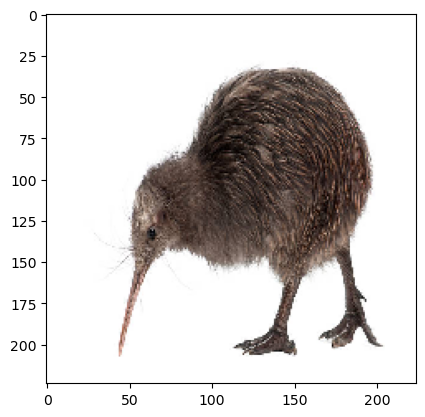

In [32]:
from IPython.display import Markdown, display
img = r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\kiwi.jpg'

pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
bird_name=output(img)
bird_name
# Assuming you have the detected bird name stored in a variable
# bird_name = 'OSTRICH'  # Replace this with your actual detection result

# ANSI escape code for bold text
bold_text = "\033[1m"

# Construct the file path with the detected bird name
file_path = r'C:\Users\praks\Downloads\Bird_Species_Classification_Streamlit-master\Bird_Species_Classification_Streamlit-master\Birds_description\{}.txt'.format(bird_name)


# Open and read the file
with open(file_path, 'r') as file:
    content = file.read()

# Print the bird name in bold using Markdown
display(Markdown(f'**{bird_name}**'))

# Print or process the content as needed
print(content)


In [33]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0


In [17]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
